In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
cust_data = pd.read_csv("C:/Users/HP/Downloads/cust_segmentation_Data.csv")
cust_data.sample(10)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
395,396,31,2,12,44,1.867,2.357,NaN,9.6
399,400,34,1,4,23,0.617,0.671,NaN,5.6
554,555,28,1,10,42,1.047,2.565,NaN,8.6
177,178,26,1,7,22,0.209,0.913,0.0,5.1
617,618,27,2,7,30,0.448,0.752,1.0,4.0
438,439,55,1,19,78,4.405,7.763,0.0,15.6
709,710,46,1,1,21,1.377,1.731,1.0,14.8
528,529,29,1,1,18,1.981,2.627,1.0,25.6
431,432,43,1,8,32,1.234,4.846,NaN,19.0
584,585,38,1,18,44,0.606,1.374,0.0,4.5


In [29]:
cust_data.isnull().sum()
cust_data[cust_data.isnull().any(axis=1)]


,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
5,6,40,1,23,81,0.998,7.831,NaN,10.9
8,9,26,1,5,18,0.575,2.215,NaN,15.5
11,12,34,2,9,40,0.374,0.266,NaN,1.6
13,14,46,1,6,30,1.415,3.865,NaN,17.6
15,16,24,1,1,16,0.185,1.287,NaN,9.2
...,...,...,...,...,...,...,...,...,...
818,819,35,2,0,35,2.383,1.957,NaN,12.4
820,821,37,1,4,24,0.419,2.989,NaN,14.2
825,826,32,2,12,116,4.027,2.585,NaN,5.7
835,836,21,3,0,41,2.367,5.628,NaN,19.5


In [30]:
cust_data['Defaulted'] = cust_data['Defaulted'].fillna(cust_data['Defaulted'].mode()[0])
cust_data.isnull().sum()
cust_data.shape

(850, 9)

In [31]:
cust_data.sample(10)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
286,287,35,1,15,77,5.501,2.661,0.0,10.6
339,340,53,2,16,44,1.333,1.131,0.0,5.6
665,666,32,1,11,53,0.089,1.660,0.0,3.3
821,822,32,1,16,38,0.694,7.286,0.0,21.0
382,383,20,3,0,17,0.044,0.347,0.0,2.3
27,28,37,1,19,38,2.591,2.539,0.0,13.5
431,432,43,1,8,32,1.234,4.846,0.0,19.0
558,559,29,1,7,20,1.006,2.954,1.0,19.8
754,755,22,1,4,24,1.636,2.108,1.0,15.6
616,617,39,1,6,42,2.541,5.817,1.0,19.9


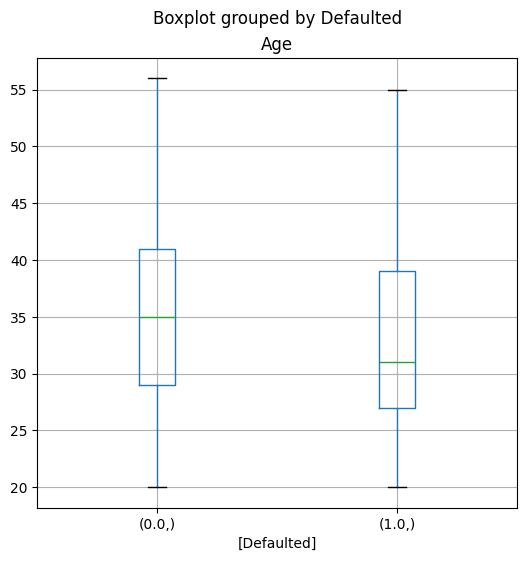

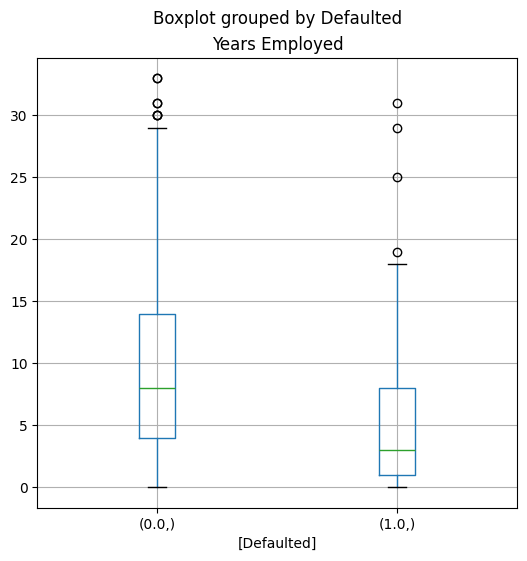

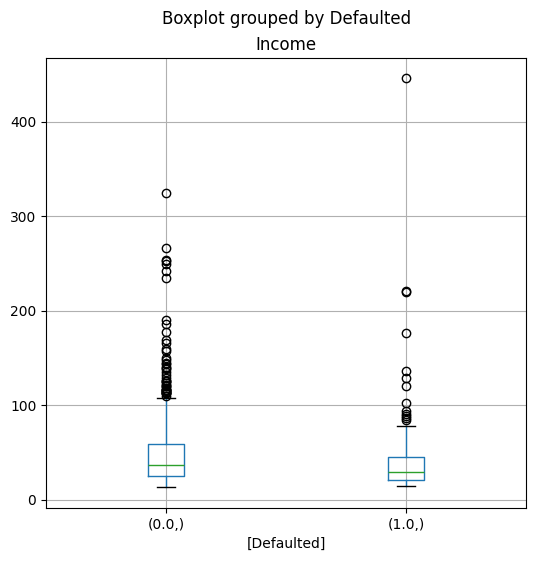

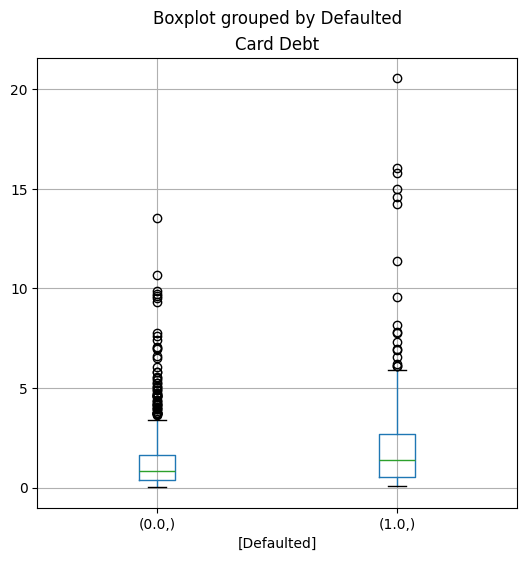

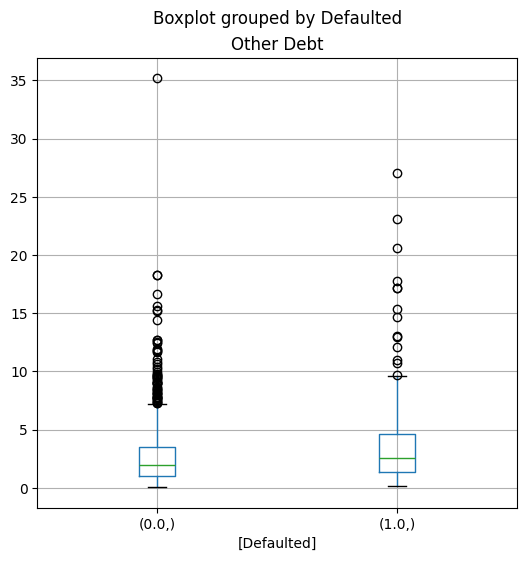

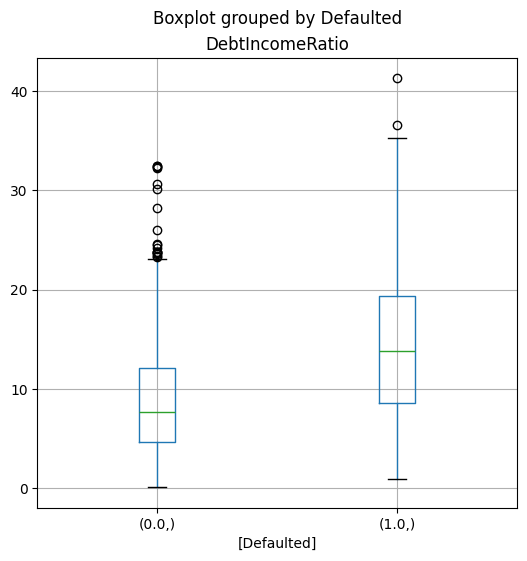

In [32]:
features = ['Age', 'Years Employed', 'Income', 'Card Debt', 'Other Debt', 'DebtIncomeRatio']
label = ['Defaulted']


for col in features:
    fig = plt.figure(figsize=(6, 6))
    ax = fig.gca()
    cust_data.boxplot(column=col, by=['Defaulted'], ax=ax) 
    
    plt.show() 

In [33]:
x = cust_data[features]
y = cust_data['Defaulted']
y = np.ravel(y)


In [34]:
#x['TotalDebt'] = x['Card Debt'] + x['Other Debt']
#x['IncomePerYearEmployed'] = x['Income'] / (x['Years Employed'] + 1)


x_transformed = x.copy()
for col in ['Income', 'Card Debt', 'Other Debt', 'DebtIncomeRatio']:
    x_transformed[col] = x_transformed[col].clip(lower=0)
    x_transformed[col] = x_transformed[col].fillna(0)
    x_transformed[col + '_log'] = np.log1p(x_transformed[col])

x_transformed.drop(columns=['Income', 'Card Debt', 'Other Debt', 'DebtIncomeRatio'], inplace=True)

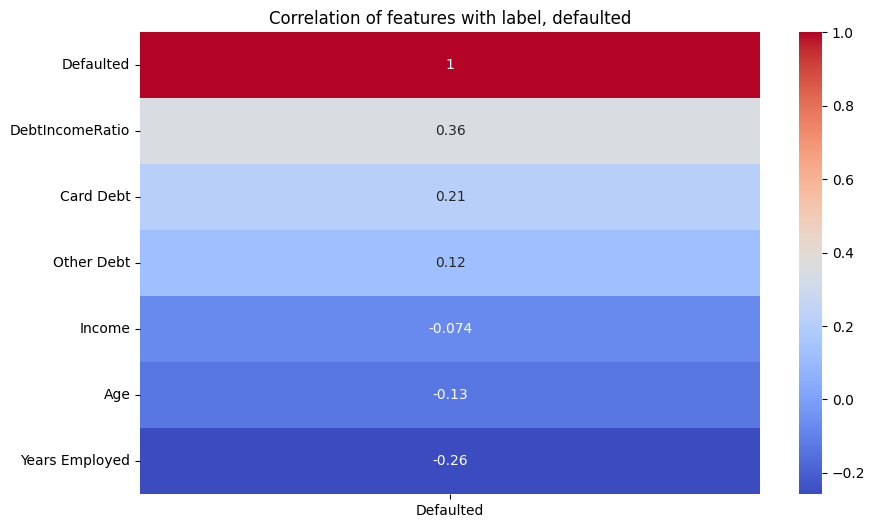

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

df = x.copy()
df['Defaulted'] = y

corr = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr[['Defaulted']].sort_values(by='Defaulted', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation of features with label, defaulted')
plt.show()



In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_transformed, y, test_size=0.3, random_state=42, stratify=y)




In [37]:
import pandas as pd

# Convert y to Series 
y = pd.Series(y)
print(y.value_counts(normalize=True))


0.0    0.784706
1.0    0.215294
Name: proportion, dtype: float64


In [38]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, HistGradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from xgboost import XGBClassifier




#preprocessing
numeric_features = [0, 1, 2, 3, 4, 5]
numeric_transformer = Pipeline(steps=[('num', StandardScaler())])

preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features)])

# Build pipeline with SMOTE using imbalanced-learn's Pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('XG', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
])


model.fit(x_train, y_train)

# Predict probabilities instead of class labels
y_probs = model.predict_proba(x_test)[:, 1]

# Lower threshold to 0.35 instead of default 0.5
threshold = 0.35
pred = (y_probs >= threshold).astype(int)



#metrics
print('Acc: ', accuracy_score(y_test, pred))
print('Precision: ', precision_score(y_test, pred))
print('Recall: ', recall_score(y_test, pred))
print('Roc: ', roc_auc_score(y_test, y_probs))






Acc:  0.7607843137254902
Precision:  0.46153846153846156
Recall:  0.6545454545454545
Roc:  0.8000909090909091


C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [23:00:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


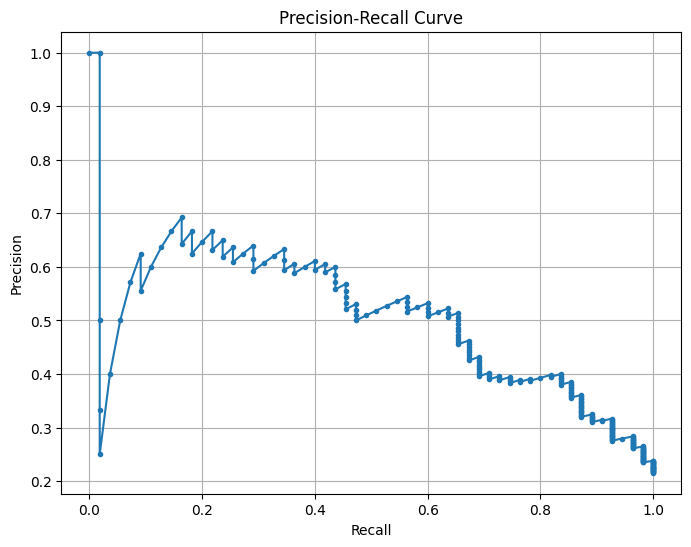

In [39]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Get predicted probabilities
y_probs = model.predict_proba(x_test)[:, 1]

# Calculating precision and recall for all thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Plotting Precision-Recall curve
plt.figure(figsize=(8,6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

In [40]:
# Get the precision, recall, and threshold values
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Printing the first few threshold, precision, and recall values to inspect
for i in range(0, len(thresholds), len(thresholds)//10):  # Print 10 points
    print(f"Threshold: {thresholds[i]:.2f} | Precision: {precision[i]:.2f} | Recall: {recall[i]:.2f}")


Threshold: 0.00 | Precision: 0.22 | Recall: 1.00
Threshold: 0.00 | Precision: 0.23 | Recall: 0.98
Threshold: 0.00 | Precision: 0.26 | Recall: 0.98
Threshold: 0.01 | Precision: 0.28 | Recall: 0.93
Threshold: 0.02 | Precision: 0.32 | Recall: 0.89
Threshold: 0.06 | Precision: 0.36 | Recall: 0.85
Threshold: 0.13 | Precision: 0.39 | Recall: 0.75
Threshold: 0.30 | Precision: 0.46 | Recall: 0.67
Threshold: 0.70 | Precision: 0.53 | Recall: 0.53
Threshold: 0.92 | Precision: 0.63 | Recall: 0.35
Threshold: 1.00 | Precision: 0.40 | Recall: 0.04


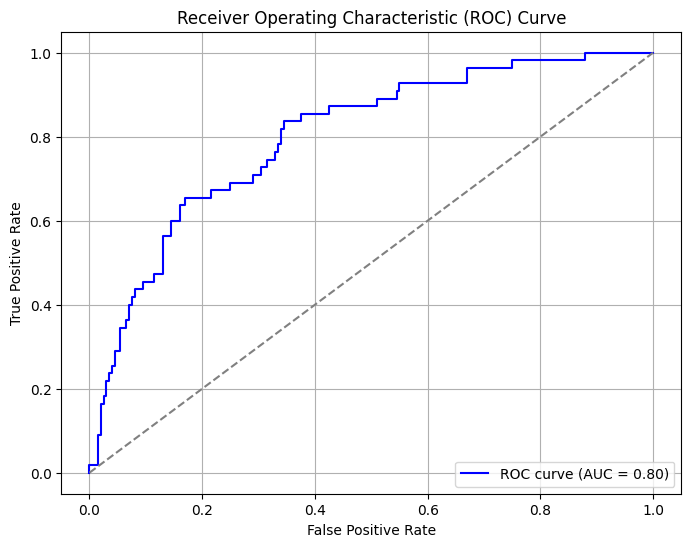

In [41]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_probs = model.predict_proba(x_test)[:, 1]

# Calculating False Positive Rate and True Positive Rate
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculating AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_probs)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [42]:
#checking for status of predictive signals using random labels
import numpy as np

# Shuffle y labels
y_random = np.random.permutation(y_train)

# Training model on random labels
model.fit(x_train, y_random)

# Predicting on test set
y_probs_random = model.predict_proba(x_test)[:, 1]
roc_auc_random = roc_auc_score(y_test, y_probs_random)

print("AUC on random labels:", roc_auc_random)


AUC on random labels: 0.5401818181818181


C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [23:00:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [43]:
#the above AUC shows that are model is doing well, meaning the data is poor, given the fact that a high AUC on random labels signlas leakage or overfitting
#checking how important the features are
from sklearn.inspection import permutation_importance

r = permutation_importance(model, x_test, y_test, n_repeats=10, random_state=42, scoring='roc_auc')
for i in np.argsort(r.importances_mean)[::-1]:
    print(f"{x_test.columns[i]}: {r.importances_mean[i]:.4f}")


Income_log: 0.0592
Card Debt_log: 0.0313
Years Employed: 0.0015
Other Debt_log: 0.0014
DebtIncomeRatio_log: -0.0153
Age: -0.0522
